Descriptive Statistics:
       current_price  original_price  discount_percentage      rating  reviews
count     608.000000      608.000000           608.000000  608.000000    608.0
mean    12991.238487     3258.523026             7.590461    3.465132      0.0
std     18681.744236     8580.761396            13.146809    1.845981      0.0
min       799.000000        0.000000             0.000000    0.000000      0.0
25%      2520.000000        0.000000             0.000000    3.600000      0.0
50%      6275.000000        0.000000             0.000000    4.400000      0.0
75%     12096.250000     2396.000000            13.000000    4.600000      0.0
max    109995.000000    85990.000000            65.000000    5.000000      0.0


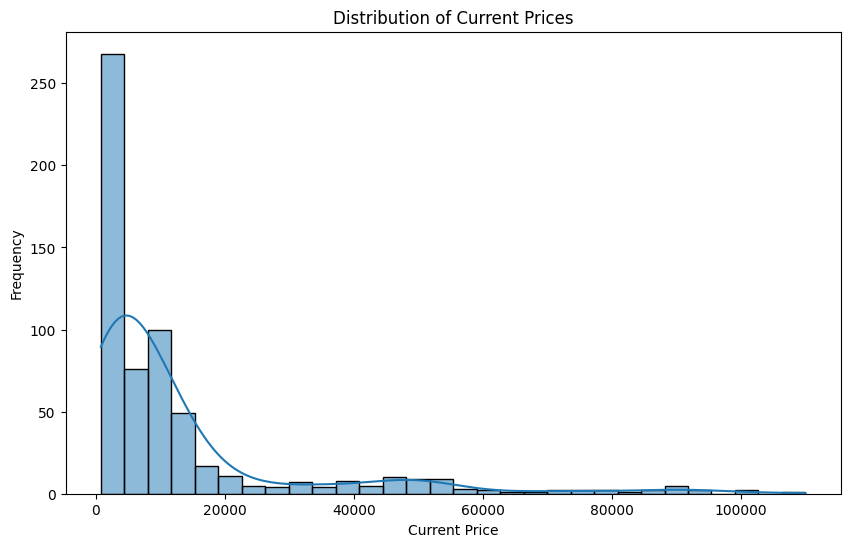

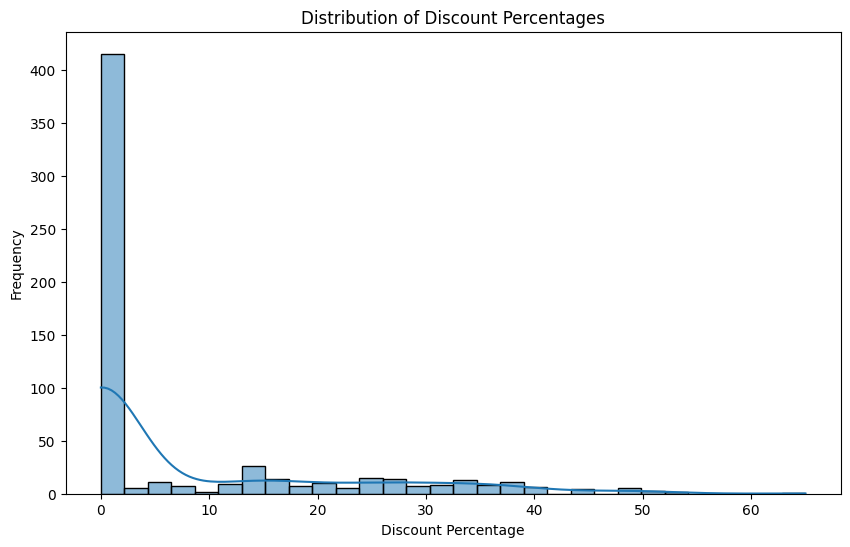

Correlation Matrix:
                     current_price  original_price  discount_percentage  \
current_price             1.000000        0.194697            -0.215786   
original_price            0.194697        1.000000             0.331666   
discount_percentage      -0.215786        0.331666             1.000000   
discounted_price          0.216303        0.993081             0.256169   

                     discounted_price  
current_price                0.216303  
original_price               0.993081  
discount_percentage          0.256169  
discounted_price             1.000000  


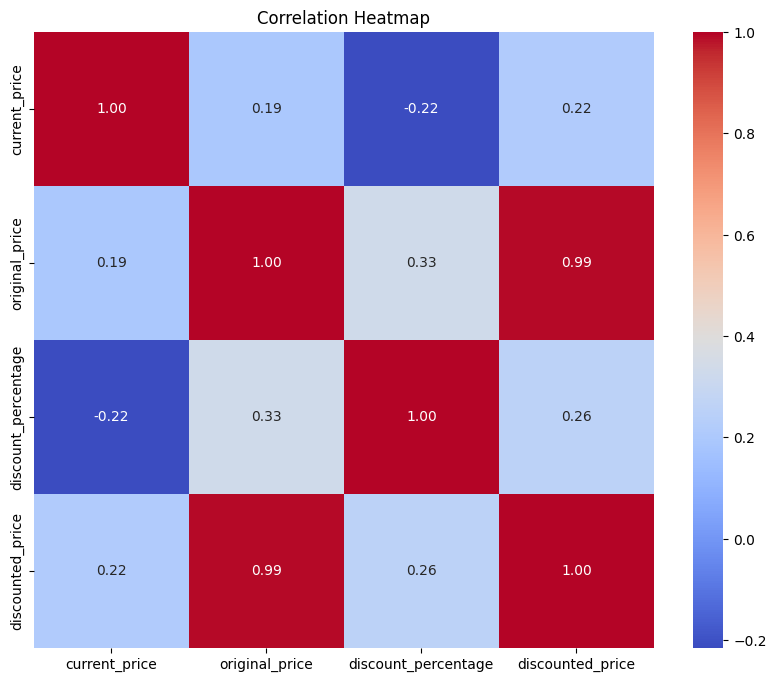

In [10]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('jumia_products.db')

# Load data into a DataFrame
df = pd.read_sql_query('SELECT * FROM products', conn)
conn.close()

# Data cleaning functions
def clean_currency(value):
    """Remove currency symbols and commas from price values."""
    if pd.isna(value) or value == '':
        return 0.0
    return float(value.replace('KSh ', '').replace(',', '').replace('₹', '').replace('$', '').strip())

def clean_percentage(value):
    """Remove percentage symbol from discount values."""
    if pd.isna(value) or value == '':
        return 0.0
    return float(value.replace('%', '').strip())

def clean_rating(value):
    """Clean rating values, considering formats like '5 out of 5'."""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if 'out of' in value:
            return float(value.split(' ')[0])
        return float(value.replace('stars', '').strip())
    except ValueError:
        return 0.0

def clean_reviews(value):
    """Clean reviews values."""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        return float(value.replace('reviews', '').replace(',', '').strip())
    except ValueError:
        return 0.0

# Apply cleaning functions
df['current_price'] = df['current_price'].apply(clean_currency)
df['original_price'] = df['original_price'].apply(clean_currency)
df['discount_percentage'] = df['discount_percentage'].apply(clean_percentage)
df['rating'] = df['rating'].apply(clean_rating)
df['reviews'] = df['reviews'].apply(clean_reviews)

# Replace NaN with 0 (optional if cleaning functions handle NaN)
df.fillna(0, inplace=True)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Distribution Analysis
def plot_distribution(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    if len(data) > 1:  # Ensure there's more than one data point
        sns.histplot(data, bins=30, kde=True)
    else:
        print("Insufficient data to plot.")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot price distribution
plot_distribution(df['current_price'], 'Distribution of Current Prices', 'Current Price', 'Frequency')

# Plot discount distribution
plot_distribution(df['discount_percentage'], 'Distribution of Discount Percentages', 'Discount Percentage', 'Frequency')

# Calculate Discounted Price
df['discounted_price'] = df['original_price'] * (1 - df['discount_percentage'] / 100)

# Correlation Analysis
correlation_matrix = df[['current_price', 'original_price', 'discount_percentage', 'discounted_price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Categorical Analysis
if 'category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='category', data=df)
    plt.title('Distribution of Products Across Categories')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

    # Discounts by Category
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='category', y='discount_percentage', data=df)
    plt.title('Discounts by Category')
    plt.xlabel('Category')
    plt.ylabel('Discount Percentage')
    plt.xticks(rotation=45)
    plt.show()
